### 다음의 데이터를 이용하여 Logistic 회귀, Support Vector Machine 방법을 이용하여 분석하고 짧은 보고서를 작성하여라.

In [4]:
# 1. Logistic 회귀

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()

In [7]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
iris.target_names # 3종류의 분꽃 분류하기

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
iris.feature_names 

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [11]:
X = iris['data'][:,3:]
y = (iris['target']==2).astype(np.int)

In [12]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver='liblinear', random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42, solver='liblinear')

In [13]:
X_n = np.linspace(0,3,100).reshape(-1,1)
y_p = log_reg.predict_proba(X_n)

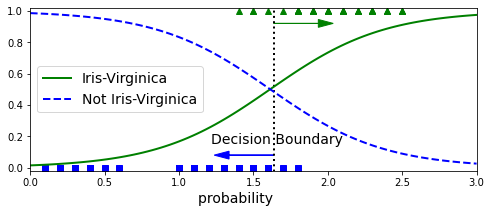

In [14]:
decision_boundary = X_n[y_p[:,1]>=0.5][0]
plt.figure(figsize=(8,3))
plt.plot(X[y==0],y[y==0],'bs')
plt.plot(X[y==1],y[y==1],'g^')
plt.plot([decision_boundary, decision_boundary],[-1,2],'k:',linewidth=2)
plt.plot(X_n, y_p[:, 1], 'g-', linewidth=2, label='Iris-Virginica')
plt.plot(X_n, y_p[:, 0], 'b--', linewidth=2, label='Not Iris-Virginica')
plt.text(decision_boundary+0.02, 0.15, 'Decision Boundary', fontsize=14, color='k', ha='center')
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel('petal width(cm)', fontsize=14)
plt.xlabel('probability        ', fontsize=14, rotation=0)
plt.legend(loc='center left', fontsize=14)
plt.axis([0,3,-0.02,1.02])
plt.show()

In [15]:
decision_boundary

array([1.63636364])

In [16]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

분석 결과 : Virginica일 경우 1로, Virginica가 아닐 경우 0으로 설정하였고 꽃잎의 너비를 기반으로 분류되는 결정경계값은 약 1.63cm가 나왔다.